<h1>HW3 by Hyomin Jeong</h1>

# Question 1
### (Bayes Theorem) Read the following example and complete the exercises 

Trolls Under the Bridge
1. Trolls(T) are bad
2. Gnomes(G) are benign
3. Every bridge has 5 creatures under it

Below are the probabilities of what creatures live under a bridge:
1. TTGGG: 20% (E1)
2. TGGGG: 20% (E2)
3. GGGGG: 60% (E3)

A knight is approaching a bridge and he wants to know his chance of crossing the bridge safely.

### 1.1 

#### What is the chance of the knight crossing the bridge safely?


In [1]:
0.6

0.6

### 1.2

#### Before crossing a bridge, a knight captures a troll. “I now have an 80% chance of crossing safely,” he reasons, “since only the case 20% had TTGGG (E1) now have TGGG is still a threat.”

#### Do you agree with him? Why?

I do not agree with him because since he obtained the information that the bridge he is about to cross had a troll, he now needs to consider posterior probability that is calculated in 1.4. Having additional data changes the probability.

### 1.3

#### Now he wants to use Bayes' theorem to calculate his chance of crossing safely given a troll captured 

\begin{equation*}
P(A|B) = \frac{P(B|A)P(A)}{P(B)} \\
P(A|B): Posteior \\
P(B|A): Likelihood \\
P(A): Prior \\
P(B): Marginal Probability \\
\end{equation*}

#### Given the three events, E1, E2, and E3, which two of the three events does the knight need to consider after a troll was captured?

E1 and E2

### 1.4

#### Use Bayes' theorem to calculate the probability of the two events in 1.3 (separately) given the troll was captured. 

Probability of one event given a troll captured: 

In [2]:
# P(E1|T) = P(T|E1) * P(E1) / {P(T|E1) * P(E1) + P(T|E2) * P(E2) + P(T|E3) * P(E3)}
E1 = 0.2
T_E1 = 2/5
E2 = 0.2
T_E2 = 1/5
E3 = 0.6
T_E3 = 0
E1_T = T_E1 * E1 / ((T_E1 * E1) + (T_E2 * E2) + (T_E3 * E3))

0.6666666666666666

Probability of the other event given a troll captured: 

In [3]:
# P(E2|T) = P(T|E2)*P(E2) / {P(T|E2)*P(E2)+P(T|E1)*P(E1)+P(T|E3)*P(E3)
E1 = 0.2
T_E1 = 2/5
E2 = 0.2
T_E2 = 1/5
E3 = 0.6
T_E3 = 0
E2_T = T_E2 * E2 / ((T_E2 * E2) + (T_E1 * E1) + (T_E3 * E3))

0.3333333333333333

### 1.5

#### What is the chance of the knight crossing safely?

In [4]:
@show E2_T

E2_T = 0.3333333333333333


0.3333333333333333

#### Now looking back to 1.1, the probabilities were changed after assimilating data! 

# Question 2
### (Polynomial Fitting) Read the following example and complete the exercises 

Biological data always comes with errors that influence the intepretation of the data significantly. In this question, we will simulate data and see how noises affect the parameter estimation.

In [5]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random"])

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [6]:
import Distributions as di
import Plots
import Polynomials
import Random

### 2.1

1. Generate the independent variable x ranging from -10 to 10 with an increment of 1
2. Generate the dependent variable y_true using the equation y_true = x^2 + 3x - 2


In [7]:
x = -10:1:10
y_true = x .^ 2 .+ 3 .* x .- 2

21-element Vector{Int64}:
  68
  52
  38
  26
  16
   8
   2
  -2
  -4
  -4
  -2
   2
   8
  16
  26
  38
  52
  68
  86
 106
 128

### 2.2

1. Generate the Guassian noises with zero mean and a standard deviation of 10

2. Add the noises to y_true to obtain y_observed


In [8]:
stdev = 10
d = di.Normal(0, stdev)

Distributions.Normal{Float64}(μ=0.0, σ=10.0)

In [9]:
y_observed = y_true .+ rand(d, length(x))

21-element Vector{Float64}:
  71.30610557368269
  51.58020138218203
  23.84555896525471
   9.72292628200572
  25.869368984347823
  -1.8917071117835729
   4.040418032781991
  24.723749920046423
 -13.614662507846175
   0.40768460029018794
 -22.322436840584125
  -0.9226304441656059
  -4.076503628824039
  14.789866096986168
  28.88164255835617
  51.24357057589418
  61.029217322332364
  60.066424888456936
  86.58257062564674
  89.54388782409423
 128.50541390366658

### 2.3

#### Fit the data (x, y_observed) with a second order polynomial. 

1. Make a scatter plot of y_observed along x
2. Plot a line of y_true along x on the scatter plot
3. Plot a line of the fitted polynomial along x on the same plot

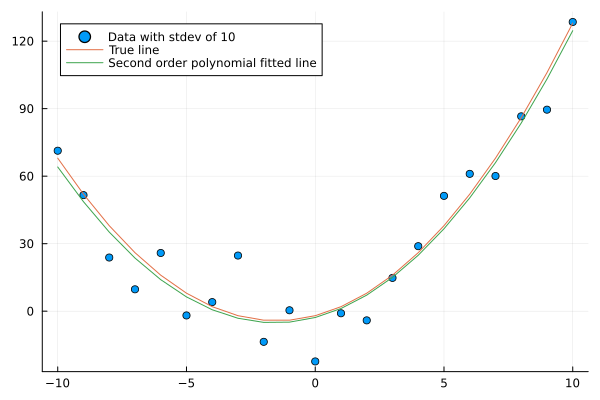

In [10]:
using Plots
using Polynomials

scatter(x, y_observed, label = "Data with stdev of 10")
plot!(x, y_true, label = "True line")
poly_fit = fit(x, y_observed, 2)
y_fitted = poly_fit.(x)
plot!(x, y_fitted, label = "Second order polynomial fitted line")

### 2.4

1. Repeat 2.2 and 2.3 with a noise with a standard deviation of 50

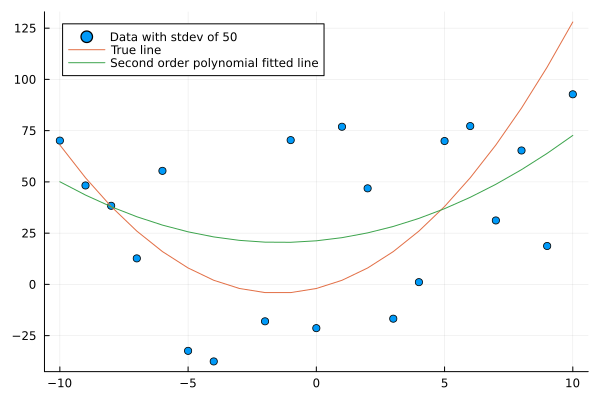

In [11]:
stdev2 = 50
d2 = di.Normal(0, stdev2)
y_observed2 = y_true .+ rand(d2, length(x))

scatter(x, y_observed2, label = "Data with stdev of 50")
plot!(x, y_true, label = "True line")
poly_fit = fit(x, y_observed2, 2)
y_fitted2 = poly_fit.(x)
plot!(x, y_fitted2, label = "Second order polynomial fitted line")

2. Compare the plot with the plot in 2.3. Is the fit closer to y_true or not, and why?

The plot from 2.3 is closer to y_true because it has less noise than than in 2.4

### 2.5

#### Repeat 2.2 and 2.3 with a tenth order polynomial fit


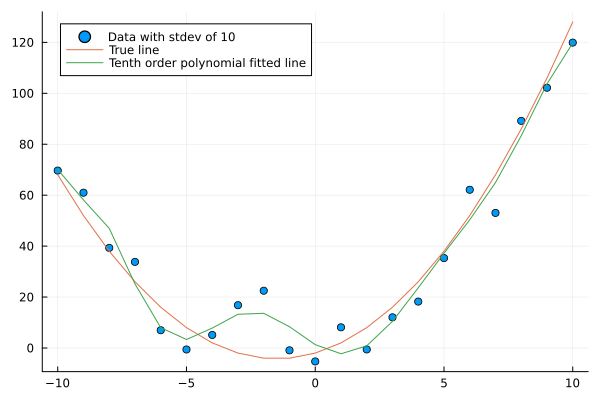

In [14]:
stdev = 10
d = di.Normal(0, stdev)
y_observed = y_true .+ rand(d, length(x))

scatter(x, y_observed, label = "Data with stdev of 10")
plot!(x, y_true, label = "True line")
poly_fit = fit(x, y_observed, 10)
y_fitted = poly_fit.(x)
plot!(x, y_fitted, label = "Tenth order polynomial fitted line")

### 2.6

1. Create a new independent parameter x_fit ranging from -11 to 11 with an increment of 0.1
2. Plot the same three plots as in 2.3 again but apply the tenth order polynomial to x_fit instead of x


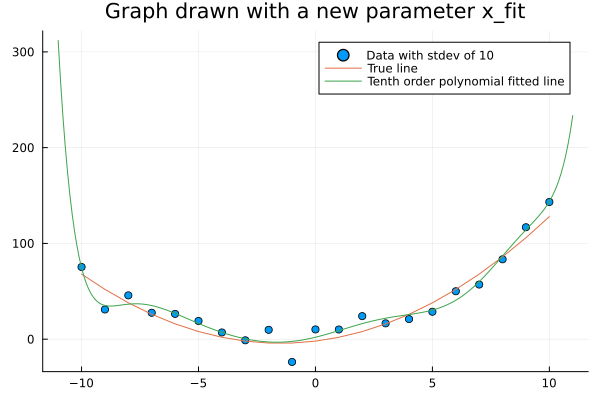

In [15]:
y_true = x .^ 2 .+ 3 .* x .- 2
stdev = 10
d = di.Normal(0, stdev)
y_observed = y_true .+ rand(d, length(x))
poly_fit = fit(x, y_observed, 10)
x_fit = -11:0.1:11
y_fitted = poly_fit.(x_fit)
scatter(x, y_observed, label = "Data with stdev of 10", title = "Graph drawn with a new parameter x_fit")
plot!(x, y_true, label = "True line")
y_fitted = poly_fit.(x_fit)
plot!(x_fit, y_fitted, label = "Tenth order polynomial fitted line")

3. What do you observe in the plot? What is this phenomenon called?

The new parameter is larger than the size of the data, thus leading to a phenomenon called "overfitting". Overfitting may lead to inaccurate predictions with false correlations or patterns.